In [1]:
from matminer.datasets import get_available_datasets
get_available_datasets()

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

['boltztrap_mp',
 'brgoch_superhard_training',
 'castelli_perovskites',
 'citrine_thermal_conductivity',
 'dielectric_constant',
 'double_perovskites_gap',
 'double_perovskites_gap_lumo',
 'elastic_tensor_2015',
 'expt_formation_enthalpy',
 'expt_formation_enthalpy_kingsbury',
 'expt_gap',
 'expt_gap_kingsbury',
 'flla',
 'glass_binary',
 'glass_binary_v2',
 'glass_ternary_hipt',
 'glass_ternary_landolt',
 'heusler_magnetic',
 'jarvis_dft_2d',
 'jarvis_dft_3d',
 'jarvis_ml_dft_training',
 'm2ax',
 'matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels',
 'mp_all_20181018',
 'mp_nostruct_20181018',
 'phonon_dielectric_mp',
 'piezoelectric_tensor',
 'ricci_boltztrap_mp_tabular',
 'steel_strength',
 'superconductivity2018',
 'tholander_nitrides',
 'ucsb_thermoe

In [3]:
import json 
import pandas as pd 

json_file_path = './expt_gap.json'

with open(json_file_path,mode='r') as json_file : 
    data = json.load(json_file)

index = data['index']
columns = data['columns']
data_values = data['data']

df = pd.DataFrame(data_values, index=index , columns=columns)

In [4]:
df.head()

,formula,gap expt
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44


In [5]:
from matminer.datasets import get_all_dataset_info
print(get_all_dataset_info('expt_gap'))

Dataset: expt_gap
Description: Experimental band gap of 6354 inorganic semiconductors.
Columns:
	formula: chemical formula
	gap expt: band gap (in eV) measured experimentally
Num Entries: 6354
Reference: https://pubs.acs.org/doi/suppl/10.1021/acs.jpclett.8b00124
Bibtex citations: ['@article{doi:10.1021/acs.jpclett.8b00124,\nauthor = {Zhuo, Ya and Mansouri Tehrani, Aria and Brgoch, Jakoah},\ntitle = {Predicting the Band Gaps of Inorganic Solids by Machine Learning},\njournal = {The Journal of Physical Chemistry Letters},\nvolume = {9},\nnumber = {7},\npages = {1668-1673},\nyear = {2018},\ndoi = {10.1021/acs.jpclett.8b00124},\nnote ={PMID: 29532658},\neprint = {\nhttps://doi.org/10.1021/acs.jpclett.8b00124\n\n}}']
File type: json.gz
Figshare URL: https://ndownloader.figshare.com/files/13464434
SHA256 Hash Digest: 2d0980e3533c1ba6ad6e392a88f08cfcf2d311d4b7fe6eb0b0c8e876211dfda3




In [6]:
df.describe()

,gap expt
count,6354.000000
mean,1.252225
std,1.539961
min,0.000000
25%,0.000000
50%,0.710000
75%,2.130000
max,11.700000


In [7]:
from matminer.featurizers.conversions import StrToComposition

str = StrToComposition()
df = str.featurize_dataframe(df,'formula')

/home/siva/miniconda3/envs/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
StrToComposition: 100%|██████████| 6354/6354 [00:01<00:00, 3664.16it/s] 



In [8]:
df.head()

,formula,gap expt,composition
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)"
1,CuBr,3.08,"(Cu, Br)"
2,LuP,1.30,"(Lu, P)"
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)"
4,ZnO,3.44,"(Zn, O)"


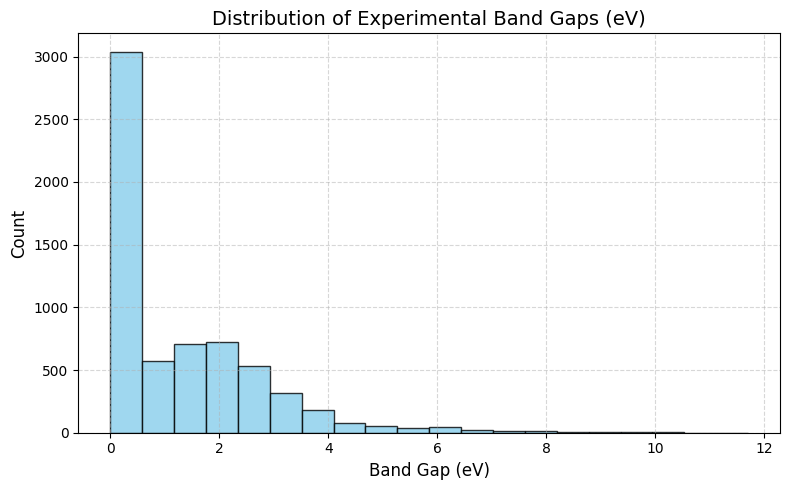

In [9]:
import matplotlib.pyplot as plt

# Sample data from df
formulas = df['formula']
gap_expt = df['gap expt']

# 1. Histogram of Band Gaps
plt.figure(figsize=(8, 5))
plt.hist(gap_expt, bins=20, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of Experimental Band Gaps (eV)', fontsize=14)
plt.xlabel('Band Gap (eV)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
import numpy as np

# Sample data
gap_expt = df['gap expt'].values

# Define number of bins
bins = 20

# Get bin counts and edges
counts, bin_edges = np.histogram(gap_expt, bins=bins)

# Print distribution to console
print("\nBand Gap Distribution:")
print(f"{'Bin Range (eV)':<20} | {'Count':<5}")
print("-" * 30)
for i in range(len(counts)):
    lower = bin_edges[i]
    upper = bin_edges[i + 1]
    print(f"{lower:.2f} – {upper:.2f}{' ' * (12 - len(f'{lower:.2f} – {upper:.2f}'))} | {counts[i]}")


Band Gap Distribution:
Bin Range (eV)       | Count
------------------------------
0.00 – 0.58  | 3034
0.58 – 1.17  | 570
1.17 – 1.75  | 705
1.75 – 2.34  | 727
2.34 – 2.92  | 531
2.92 – 3.51  | 316
3.51 – 4.09  | 182
4.09 – 4.68  | 77
4.68 – 5.26  | 50
5.26 – 5.85  | 41
5.85 – 6.43  | 44
6.43 – 7.02  | 23
7.02 – 7.60  | 17
7.60 – 8.19  | 14
8.19 – 8.77  | 8
8.77 – 9.36  | 5
9.36 – 9.95  | 2
9.95 – 10.53 | 6
10.53 – 11.11 | 1
11.11 – 11.70 | 1


In [11]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming df is your DataFrame with numerical features and 'gap expt'

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("=== Statistical Summary for Numerical Features ===\n")

for col in numeric_cols:
    data = df[col]
    
    # Skip if all NaN
    if data.isna().all():
        continue
    
    print(f"Feature: {col}")
    print(f"{'Mean':<15}: {data.mean():.4f}")
    print(f"{'Median':<15}: {data.median():.4f}")
    print(f"{'Std Dev':<15}: {data.std():.4f}")
    print(f"{'Min':<15}: {data.min():.4f}")
    print(f"{'Max':<15}: {data.max():.4f}")
    print(f"{'25% Quartile':<15}: {data.quantile(0.25):.4f}")
    print(f"{'75% Quartile':<15}: {data.quantile(0.75):.4f}")
    print(f"{'IQR':<15}: {data.quantile(0.75) - data.quantile(0.25):.4f}")
    print(f"{'Skewness':<15}: {stats.skew(data):.4f}")
    print(f"{'Kurtosis':<15}: {stats.kurtosis(data):.4f}")
    print(f"{'Missing (%)':<15}: {data.isna().mean() * 100:.2f}%")
    print("-" * 40)

=== Statistical Summary for Numerical Features ===

Feature: gap expt
Mean           : 1.2522
Median         : 0.7100
Std Dev        : 1.5400
Min            : 0.0000
Max            : 11.7000
25% Quartile   : 0.0000
75% Quartile   : 2.1300
IQR            : 2.1300
Skewness       : 1.7138
Kurtosis       : 4.2937
Missing (%)    : 0.00%
----------------------------------------


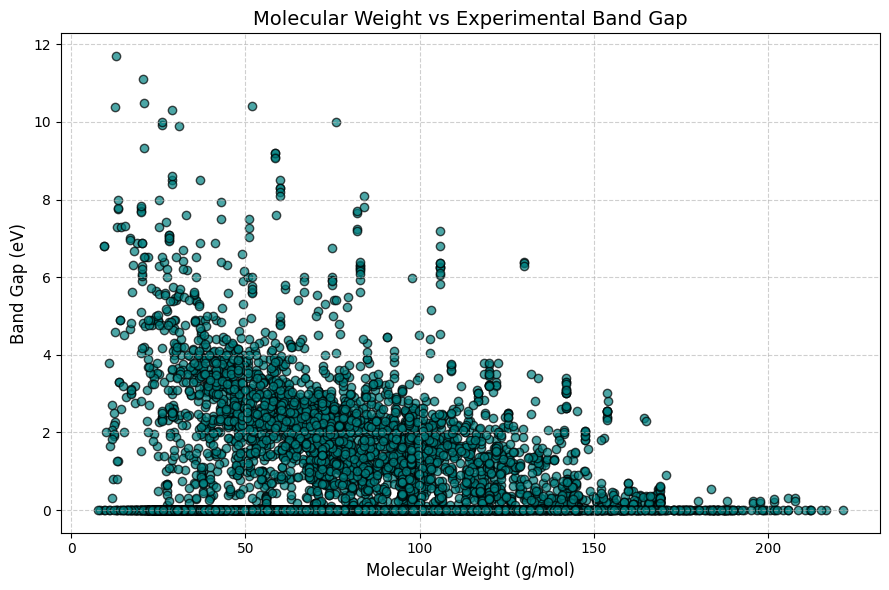

In [12]:
import re
import numpy as np
from molmass import Formula

def parse_alloy_formula(formula_str):
    # Split alloy formulas like 'Hg0.7Cd0.3Te' into {'Hg': 0.7, 'Cd': 0.3, 'Te': 1.0}
    element_pattern = r'([A-Z][a-z]?)(\d*\.?\d*)'
    matches = re.findall(element_pattern, formula_str)
    
    composition = {}
    for elem, amount in matches:
        if amount == '':
            amount = 1.0
        else:
            amount = float(amount)
        composition[elem] = amount

    if not composition:
        return np.nan

    total_amount = sum(composition.values())
    avg_mass = 0.0

    for elem, frac in composition.items():
        try:
            f = Formula(elem)
            avg_mass += f.isotope.mass * frac
        except Exception:
            return np.nan

    return avg_mass / total_amount

# Apply the new function
df['molecular_weight'] = df['formula'].apply(parse_alloy_formula)

# Drop NaNs
df_clean = df.dropna(subset=['molecular_weight'])

plt.figure(figsize=(9, 6))
plt.scatter(
    df_clean['molecular_weight'],
    df_clean['gap expt'],
    color='teal',
    alpha=0.7,
    edgecolor='k'
)

plt.title('Molecular Weight vs Experimental Band Gap', fontsize=14)
plt.xlabel('Molecular Weight (g/mol)', fontsize=12)
plt.ylabel('Band Gap (eV)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [13]:
'''from matminer.featurizers.composition import ElementFraction

ef = ElementFraction()
df = ef.featurize_dataframe(df, 'composition',ignore_errors=True)
df.head()'''

"from matminer.featurizers.composition import ElementFraction\n\nef = ElementFraction()\ndf = ef.featurize_dataframe(df, 'composition',ignore_errors=True)\ndf.head()"

In [14]:
from matminer.featurizers.composition import ElementProperty

featurizer = ElementProperty.from_preset('magpie')
bg_data_featurized = featurizer.featurize_dataframe(df, 'composition',ignore_errors=True)
bg_data_featurized.head() 

/home/siva/miniconda3/envs/venv/lib/python3.11/site-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)
ElementProperty: 100%|██████████| 6354/6354 [00:08<00:00, 760.54it/s]



,formula,gap expt,composition,molecular_weight,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",152.728341,48.0,80.0,32.0,61.20,13.1600,52.0,...,0.000000,0.000000,0.000000,0.0,152.0,194.0,42.0,163.200,11.200,152.0
1,CuBr,3.08,"(Cu, Br)",70.923968,29.0,35.0,6.0,32.00,3.0000,29.0,...,0.000000,0.000000,0.000000,0.0,64.0,225.0,161.0,144.500,80.500,64.0
2,LuP,1.30,"(Lu, P)",102.957269,15.0,71.0,56.0,43.00,28.0000,15.0,...,0.002247,0.001124,0.001124,0.0,2.0,194.0,192.0,98.000,96.000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",78.669837,29.0,51.0,22.0,34.25,4.1875,34.0,...,0.000000,0.000000,0.000000,0.0,14.0,225.0,211.0,112.125,98.125,14.0
4,ZnO,3.44,"(Zn, O)",39.962028,8.0,30.0,22.0,19.00,11.0000,8.0,...,0.000000,0.000000,0.000000,0.0,12.0,194.0,182.0,103.000,91.000,12.0


In [15]:
bg_data = bg_data_featurized[bg_data_featurized['gap expt'] > 0].reset_index(drop=True)
display(bg_data.head())
bg_data
y = bg_data['gap expt']

,formula,gap expt,composition,molecular_weight,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",152.728341,48.0,80.0,32.0,61.20,13.1600,52.0,...,0.000000,0.000000,0.000000,0.0,152.0,194.0,42.0,163.200,11.200,152.0
1,CuBr,3.08,"(Cu, Br)",70.923968,29.0,35.0,6.0,32.00,3.0000,29.0,...,0.000000,0.000000,0.000000,0.0,64.0,225.0,161.0,144.500,80.500,64.0
2,LuP,1.30,"(Lu, P)",102.957269,15.0,71.0,56.0,43.00,28.0000,15.0,...,0.002247,0.001124,0.001124,0.0,2.0,194.0,192.0,98.000,96.000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",78.669837,29.0,51.0,22.0,34.25,4.1875,34.0,...,0.000000,0.000000,0.000000,0.0,14.0,225.0,211.0,112.125,98.125,14.0
4,ZnO,3.44,"(Zn, O)",39.962028,8.0,30.0,22.0,19.00,11.0000,8.0,...,0.000000,0.000000,0.000000,0.0,12.0,194.0,182.0,103.000,91.000,12.0


In [16]:
import matplotlib.pyplot as plt
bg_data = bg_data.dropna(how='any',axis=0)
bg_data.head()

,formula,gap expt,composition,molecular_weight,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",152.728341,48.0,80.0,32.0,61.20,13.1600,52.0,...,0.000000,0.000000,0.000000,0.0,152.0,194.0,42.0,163.200,11.200,152.0
1,CuBr,3.08,"(Cu, Br)",70.923968,29.0,35.0,6.0,32.00,3.0000,29.0,...,0.000000,0.000000,0.000000,0.0,64.0,225.0,161.0,144.500,80.500,64.0
2,LuP,1.30,"(Lu, P)",102.957269,15.0,71.0,56.0,43.00,28.0000,15.0,...,0.002247,0.001124,0.001124,0.0,2.0,194.0,192.0,98.000,96.000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",78.669837,29.0,51.0,22.0,34.25,4.1875,34.0,...,0.000000,0.000000,0.000000,0.0,14.0,225.0,211.0,112.125,98.125,14.0
4,ZnO,3.44,"(Zn, O)",39.962028,8.0,30.0,22.0,19.00,11.0000,8.0,...,0.000000,0.000000,0.000000,0.0,12.0,194.0,182.0,103.000,91.000,12.0


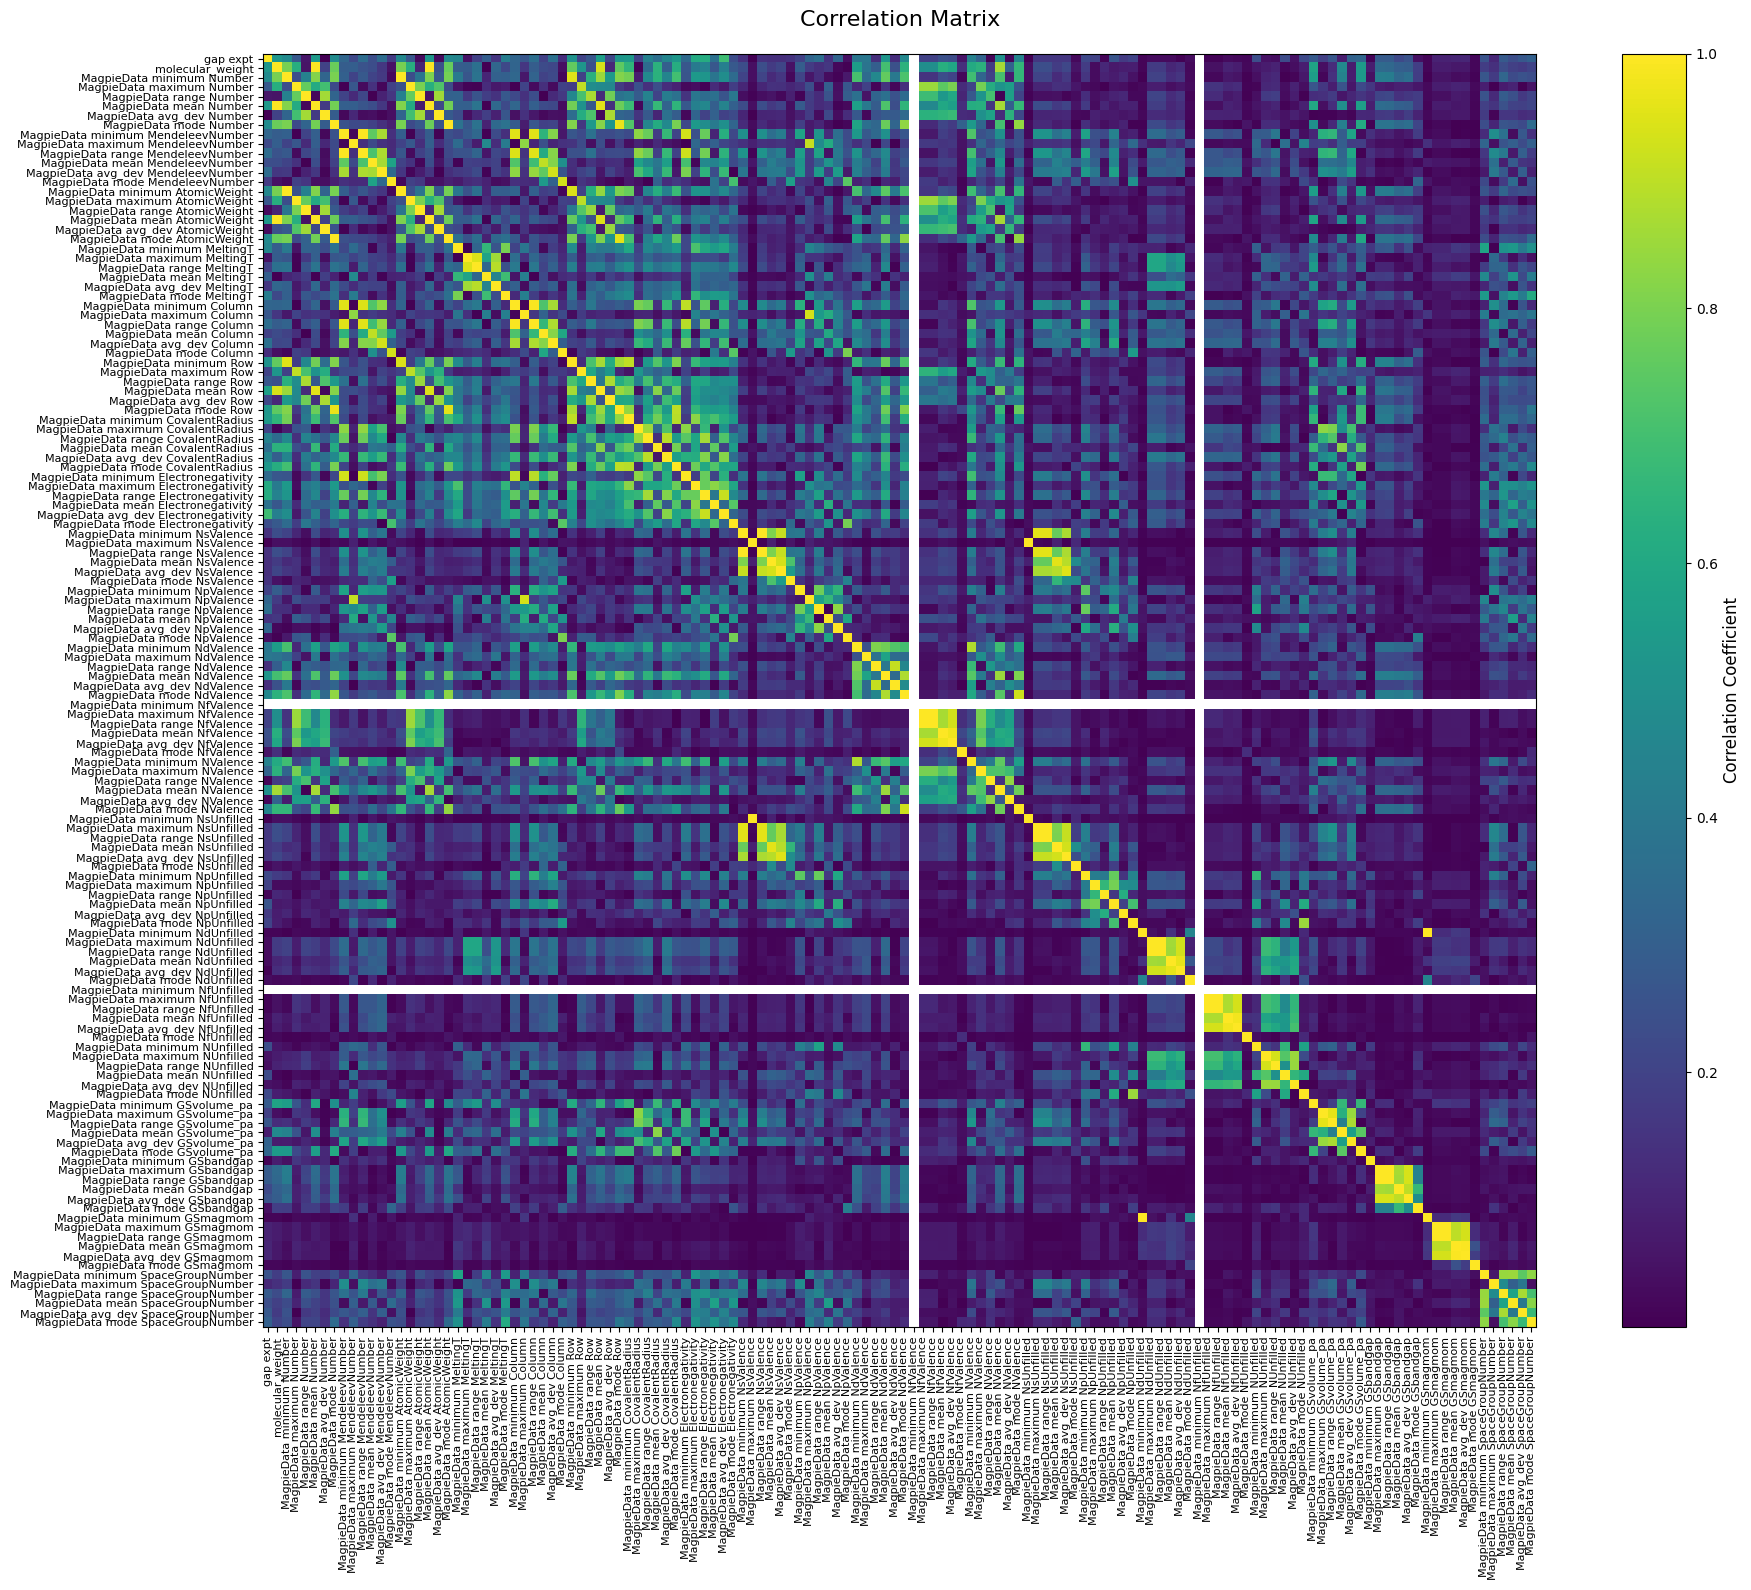

In [17]:
import matplotlib.pyplot as plt

# Select numeric data and compute the correlation matrix
numeric_data = bg_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr().abs()

# Create the plot
fig, ax = plt.subplots(figsize=(20, 16))  # Adjust the figure size if needed
h = ax.imshow(corr_matrix)  # Change the colormap to 'Reds'

# Add colorbar
cbar = plt.colorbar(h)
cbar.set_label('Correlation Coefficient', fontsize=12)

# Add labels
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90, fontsize=8)  # Rotate x-axis labels
ax.set_yticklabels(corr_matrix.columns, fontsize=8)
ax.set_title('Correlation Matrix', fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()


In [18]:
import numpy as np 
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column]>0.95)]
to_drop += list(bg_data.columns[bg_data.isin([0]).sum() > 100])

bg_data_cleaned = bg_data.drop(to_drop, axis=1)
display(bg_data_cleaned)

,formula,gap expt,composition,molecular_weight,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData maximum GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",152.728341,48.0,80.0,32.0,13.1600,52.0,70.0,...,34.763333,29.139072,5.624261,34.763333,152.0,194.0,42.0,163.200,11.200,152.0
1,CuBr,3.08,"(Cu, Br)",70.923968,29.0,35.0,6.0,3.0000,29.0,64.0,...,29.480000,20.275000,9.205000,11.070000,64.0,225.0,161.0,144.500,80.500,64.0
2,LuP,1.30,"(Lu, P)",102.957269,15.0,71.0,56.0,28.0000,15.0,41.0,...,28.865000,25.717619,3.147381,22.570238,2.0,194.0,192.0,98.000,96.000,2.0
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",78.669837,29.0,51.0,22.0,4.1875,34.0,64.0,...,31.560000,21.056250,7.489688,25.920000,14.0,225.0,211.0,112.125,98.125,14.0
4,ZnO,3.44,"(Zn, O)",39.962028,8.0,30.0,22.0,11.0000,8.0,69.0,...,13.960000,11.532500,2.427500,9.105000,12.0,194.0,182.0,103.000,91.000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,ZnTe,2.25,"(Zn, Te)",96.917682,30.0,52.0,22.0,11.0000,30.0,69.0,...,34.763333,24.361667,10.401667,13.960000,152.0,194.0,42.0,173.000,21.000,152.0
3892,ZnTe,2.29,"(Zn, Te)",96.917682,30.0,52.0,22.0,11.0000,30.0,69.0,...,34.763333,24.361667,10.401667,13.960000,152.0,194.0,42.0,173.000,21.000,152.0
3893,ZnSe,2.76,"(Zn, Se)",71.922832,30.0,34.0,4.0,2.0000,30.0,69.0,...,25.920000,19.940000,5.980000,13.960000,14.0,194.0,180.0,104.000,90.000,14.0
3894,ZnSnP2,1.66,"(Zn, Sn, P)",61.444717,15.0,50.0,35.0,12.5000,15.0,69.0,...,33.285000,23.096369,5.094315,22.570238,2.0,194.0,192.0,84.750,82.750,2.0


Epoch 10/10000, Loss: 1.6281
Epoch 20/10000, Loss: 1.3604
Epoch 30/10000, Loss: 1.0990
Epoch 40/10000, Loss: 1.0106
Epoch 50/10000, Loss: 0.9426
Epoch 60/10000, Loss: 0.8893
Epoch 70/10000, Loss: 0.8474
Epoch 80/10000, Loss: 0.8126
Epoch 90/10000, Loss: 0.7816
Epoch 100/10000, Loss: 0.7542
Epoch 110/10000, Loss: 0.7293
Epoch 120/10000, Loss: 0.7058
Epoch 130/10000, Loss: 0.6836
Epoch 140/10000, Loss: 0.6621
Epoch 150/10000, Loss: 0.6415
Epoch 160/10000, Loss: 0.6220
Epoch 170/10000, Loss: 0.6032
Epoch 180/10000, Loss: 0.5853
Epoch 190/10000, Loss: 0.5682
Epoch 200/10000, Loss: 0.5521
Epoch 210/10000, Loss: 0.5369
Epoch 220/10000, Loss: 0.5224
Epoch 230/10000, Loss: 0.5084
Epoch 240/10000, Loss: 0.4952
Epoch 250/10000, Loss: 0.4855
Epoch 260/10000, Loss: 0.4736
Epoch 270/10000, Loss: 0.4632
Epoch 280/10000, Loss: 0.4525
Epoch 290/10000, Loss: 0.4423
Epoch 300/10000, Loss: 0.4318
Epoch 310/10000, Loss: 0.4367
Epoch 320/10000, Loss: 0.4193
Epoch 330/10000, Loss: 0.4122
Epoch 340/10000, Lo

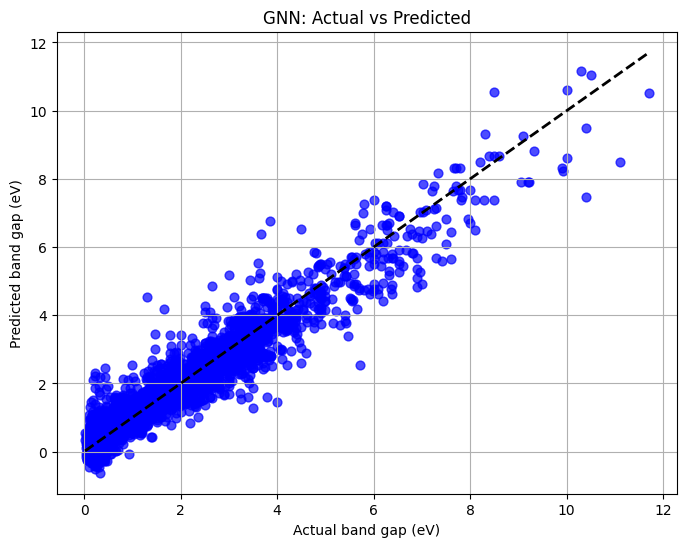

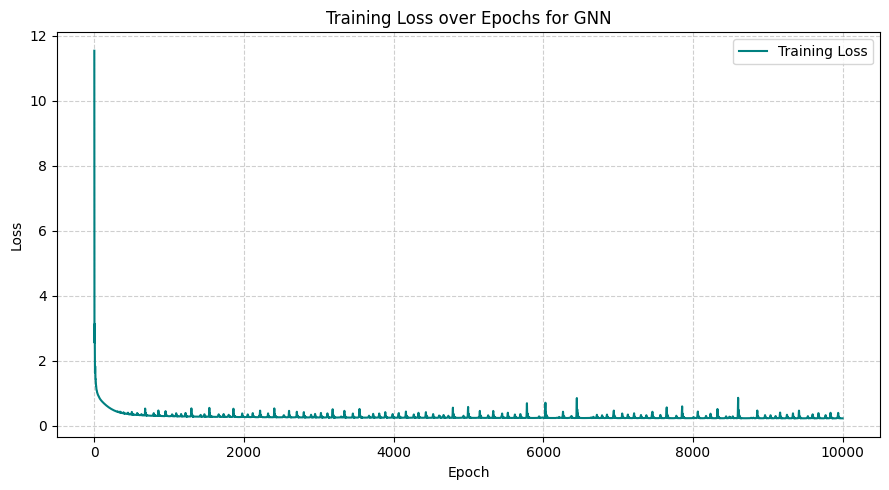

In [65]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import kneighbors_graph

# Step 1: Prepare the data
X = bg_data_cleaned.loc[:, featurizer.feature_labels()[0]:].values
y = bg_data_cleaned['gap expt'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an adjacency matrix using k-nearest neighbors
adj_matrix = kneighbors_graph(X_scaled, n_neighbors=5, mode='connectivity', include_self=False)
edge_index = torch.tensor(np.array(adj_matrix.nonzero()), dtype=torch.long)

# Convert data to PyTorch Geometric format
data = Data(x=torch.tensor(X_scaled, dtype=torch.float),
            y=torch.tensor(y, dtype=torch.float).view(-1, 1),
            edge_index=edge_index)

# Step 2: Define the GNN model
class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
input_dim = X_scaled.shape[1]
hidden_dim = 64
output_dim = 1
model = GNN(input_dim, hidden_dim, output_dim)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

# List to store losses
loss_history = []

# Step 3: Train the GNN
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = loss_fn(out, data.y)
    loss.backward()
    optimizer.step()

    # Record loss
    loss_history.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Step 4: Evaluate the GNN
model.eval()
with torch.no_grad():
    predictions = model(data).squeeze().numpy()

# Calculate evaluation metrics
mse = mean_squared_error(data.y.numpy(), predictions)
mae = mean_absolute_error(data.y.numpy(), predictions)
rmse = np.sqrt(mse)

print(f"Final MSE: {mse:.4f}")
print(f"Final RMSE: {rmse:.4f}")
print(f"Final MAE: {mae:.4f}")

# Step 5: Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(data.y.numpy(), predictions, s=40, color='blue', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual band gap (eV)")
plt.ylabel("Predicted band gap (eV)")
plt.title("GNN: Actual vs Predicted")
plt.grid(True)
plt.show()

# Step 6: Plot Epoch vs Loss
plt.figure(figsize=(9, 5))
plt.plot(loss_history, label='Training Loss', color='teal')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs for GNN')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Top 20 Most Important Features:
                                 Feature  Importance
26        MagpieData mode CovalentRadius    0.838360
47         MagpieData maximum NpUnfilled    0.506215
20                MagpieData maximum Row    0.502524
52             MagpieData mean NUnfilled    0.472322
31  MagpieData avg_dev Electronegativity    0.469134
49            MagpieData mean NpUnfilled    0.441743
14           MagpieData avg_dev MeltingT    0.405224
40          MagpieData avg_dev NpValence    0.403142
17                MagpieData mean Column    0.373005
48           MagpieData range NpUnfilled    0.364192
33          MagpieData minimum NsValence    0.359829
53        MagpieData minimum GSvolume_pa    0.339499
11           MagpieData maximum MeltingT    0.338452
25     MagpieData avg_dev CovalentRadius    0.333640
4                 MagpieData mode Number    0.331409
22     MagpieData maximum CovalentRadius    0.327537
42           MagpieData maximum NValence    0.324879
6     MagpieD

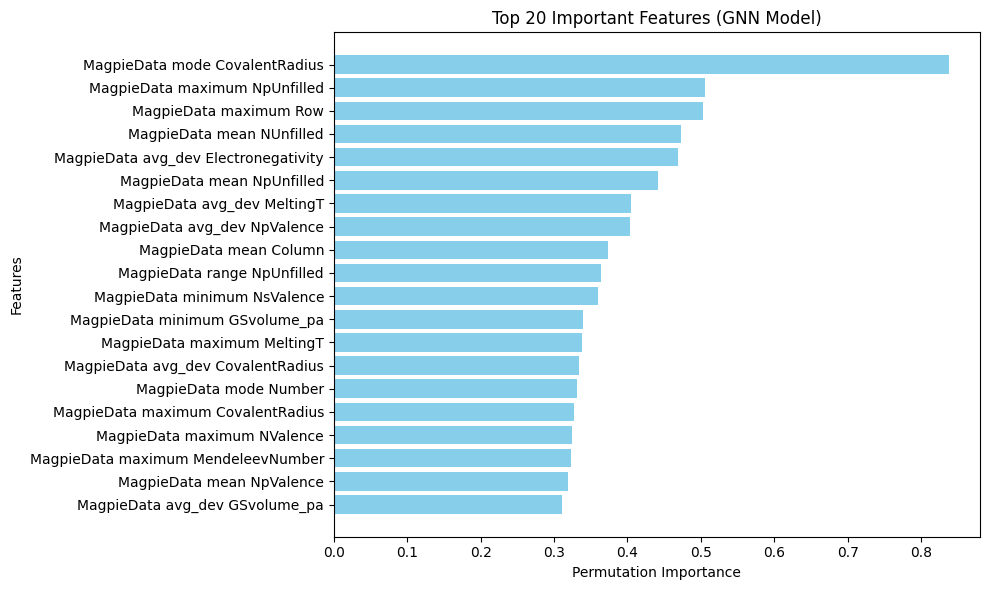

In [66]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
import torch
from torch_geometric.data import Data
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Wrap the PyTorch GNN into a scikit-learn compatible estimator
class GNNEstimatorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model, edge_index):
        self.model = model
        self.edge_index = edge_index  # Save edge index for prediction

    def fit(self, X=None, y=None):
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            data = Data(x=torch.tensor(X, dtype=torch.float32), edge_index=self.edge_index)
            out = self.model(data).numpy().flatten()
            return out

# Step 2: Wrap your trained GNN model using the edge_index from training
wrapped_model = GNNEstimatorWrapper(model, edge_index)

# Step 3: Run permutation importance
result = permutation_importance(
    wrapped_model,
    X_scaled,
    y,
    scoring='neg_mean_absolute_error',
    n_repeats=10,
    random_state=42
)

# Step 4: Get feature names
feature_names = bg_data_cleaned.loc[:, featurizer.feature_labels()[0]:].columns.tolist()

# Step 5: Create DataFrame and sort by importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False).head(20)

print("\nTop 20 Most Important Features:")
print(feature_importance_df)

# Step 6: Plot top 20 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features (GNN Model)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [67]:
bg_data_cleaned["band_gap predicted"] = predictions
bg_data_cleaned['percentage_error'] = (bg_data_cleaned["gap expt"] - bg_data_cleaned['band_gap predicted']).abs()/bg_data_cleaned['gap expt'] * 100
bg_data_cleaned.head(20)

,formula,gap expt,composition,molecular_weight,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,band_gap predicted,percentage_error
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",152.728341,48.0,80.0,32.0,13.160000,52.0,70.0,...,5.624261,34.763333,152.0,194.0,42.0,163.200000,11.200000,152.0,0.299174,14.521660
1,CuBr,3.08,"(Cu, Br)",70.923968,29.0,35.0,6.0,3.000000,29.0,64.0,...,9.205000,11.070000,64.0,225.0,161.0,144.500000,80.500000,64.0,3.101768,0.706738
2,LuP,1.30,"(Lu, P)",102.957269,15.0,71.0,56.0,28.000000,15.0,41.0,...,3.147381,22.570238,2.0,194.0,192.0,98.000000,96.000000,2.0,1.036129,20.297742
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",78.669837,29.0,51.0,22.0,4.187500,34.0,64.0,...,7.489688,25.920000,14.0,225.0,211.0,112.125000,98.125000,14.0,0.311200,22.200054
4,ZnO,3.44,"(Zn, O)",39.962028,8.0,30.0,22.0,11.000000,8.0,69.0,...,2.427500,9.105000,12.0,194.0,182.0,103.000000,91.000000,12.0,4.050180,17.737789
5,PtSb2,0.08,"(Pt, Sb)",145.590805,51.0,78.0,27.0,12.000000,51.0,63.0,...,7.351111,31.560000,166.0,225.0,59.0,185.666667,26.222222,166.0,0.038293,52.133298
6,ZnIn2S4,2.68,"(Zn, In, S)",60.232169,16.0,49.0,33.0,13.061224,16.0,69.0,...,2.771735,25.786875,70.0,194.0,124.0,107.428571,42.775510,70.0,3.097272,15.569848
7,K2Cd3Te4,2.26,"(K, Cd, Te)",104.362489,19.0,52.0,33.0,10.814815,52.0,3.0,...,15.516461,34.763333,152.0,229.0,77.0,183.111111,27.654321,152.0,1.707729,24.436771
8,K4Sn3Ce3S14,2.46,"(K, Sn, Ce, S)",57.620282,16.0,58.0,42.0,14.000000,16.0,3.0,...,12.654148,25.786875,70.0,229.0,159.0,120.875000,59.354167,70.0,2.198098,10.646406
9,Pb6B2CrO12,1.80,"(Pb, B, Cr, O)",72.083715,5.0,82.0,77.0,29.931973,8.0,49.0,...,7.805578,9.105000,12.0,229.0,217.0,97.857143,98.122449,12.0,3.085782,71.432323


In [68]:
print(bg_data_cleaned.columns)

Index(['formula', 'gap expt', 'composition', 'molecular_weight',
       'MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData avg_dev Number',
       'MagpieData mode Number', 'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber', 'MagpieData mean MendeleevNumber',
       'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber',
       'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT',
       'MagpieData range MeltingT', 'MagpieData mean MeltingT',
       'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT',
       'MagpieData maximum Column', 'MagpieData mean Column',
       'MagpieData avg_dev Column', 'MagpieData mode Column',
       'MagpieData maximum Row', 'MagpieData minimum CovalentRadius',
       'MagpieData maximum CovalentRadius', 'MagpieData range CovalentRadius',
       'MagpieData mean CovalentRadius', 'MagpieData avg_dev CovalentRadius',
       'MagpieData mode Co

Epoch 10/10000, Loss: 0.7151
Epoch 20/10000, Loss: 0.3974
Epoch 30/10000, Loss: 0.2907
Epoch 40/10000, Loss: 0.2278
Epoch 50/10000, Loss: 0.2085
Epoch 60/10000, Loss: 0.1952
Epoch 70/10000, Loss: 0.1869
Epoch 80/10000, Loss: 0.1799
Epoch 90/10000, Loss: 0.1739
Epoch 100/10000, Loss: 0.1681
Epoch 110/10000, Loss: 0.1622
Epoch 120/10000, Loss: 0.1564
Epoch 130/10000, Loss: 0.1504
Epoch 140/10000, Loss: 0.1447
Epoch 150/10000, Loss: 0.1400
Epoch 160/10000, Loss: 0.1357
Epoch 170/10000, Loss: 0.1339
Epoch 180/10000, Loss: 0.1285
Epoch 190/10000, Loss: 0.1238
Epoch 200/10000, Loss: 0.1184
Epoch 210/10000, Loss: 0.1214
Epoch 220/10000, Loss: 0.1179
Epoch 230/10000, Loss: 0.1152
Epoch 240/10000, Loss: 0.1072
Epoch 250/10000, Loss: 0.1039
Epoch 260/10000, Loss: 0.1066
Epoch 270/10000, Loss: 0.1067
Epoch 280/10000, Loss: 0.1278
Epoch 290/10000, Loss: 0.0992
Epoch 300/10000, Loss: 0.0947
Epoch 310/10000, Loss: 0.0914
Epoch 320/10000, Loss: 0.0874
Epoch 330/10000, Loss: 0.0958
Epoch 340/10000, Lo

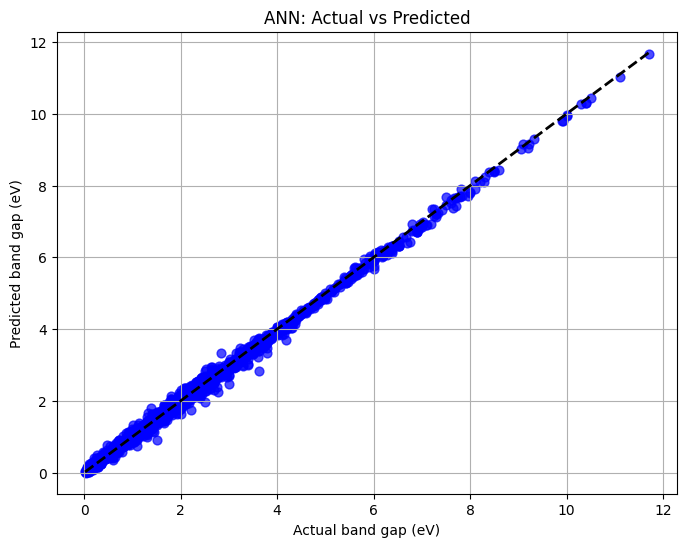

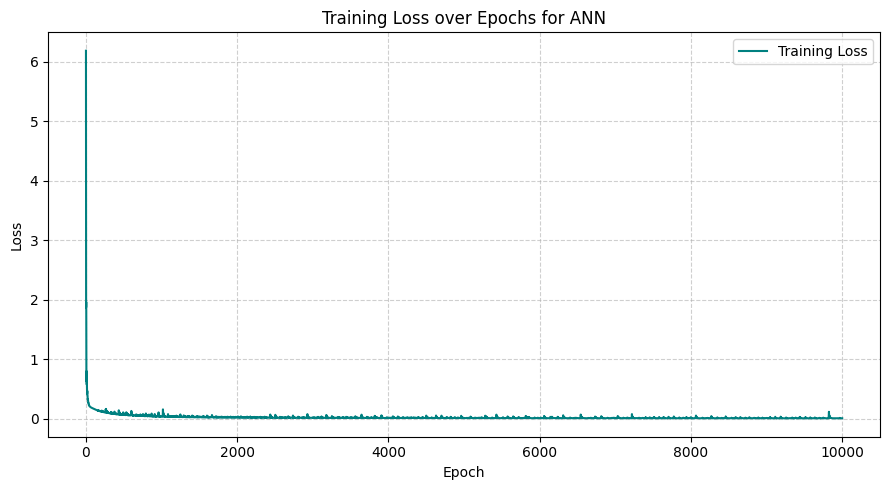

In [27]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract features and target
X = bg_data_cleaned.loc[:, featurizer.feature_labels()[0]:].values
y = bg_data_cleaned['gap expt'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Step 2: Define the ANN model
class ANN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

# Initialize the model
input_dim = X.shape[1]
hidden_dim = 64
output_dim = 1
model = ANN(input_dim, hidden_dim, output_dim)

# Step 3: Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# List to store losses
loss_history = []

# Step 4: Train the model
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_tensor)
    loss = loss_fn(predictions, y_tensor)
    loss.backward()
    optimizer.step()

    # Record loss
    loss_history.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Step 5: Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_tensor)
    y_pred = y_pred_tensor.numpy()

# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"Final MSE: {mse:.4f}")
print(f"Final RMSE: {rmse:.4f}")
print(f"Final MAE: {mae:.4f}")

# Step 6: Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, s=40, color='blue', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual band gap (eV)")
plt.ylabel("Predicted band gap (eV)")
plt.title("ANN: Actual vs Predicted")
plt.grid(True)
plt.show()

# Step 7: Plot Epoch vs Loss
plt.figure(figsize=(9, 5))
plt.plot(loss_history, label='Training Loss', color='teal')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs for ANN')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Top 20 Most Important Features (Based on Permutation Importance):
                                 Feature  Importance
25        MagpieData mean CovalentRadius    0.461247
40             MagpieData mean NpValence    0.453830
41          MagpieData avg_dev NpValence    0.450227
65                    band_gap predicted    0.406773
46           MagpieData avg_dev NValence    0.379680
53             MagpieData mean NUnfilled    0.330971
50            MagpieData mean NpUnfilled    0.309492
66                      percentage_error    0.287494
21                MagpieData maximum Row    0.285132
48         MagpieData maximum NpUnfilled    0.274259
4              MagpieData avg_dev Number    0.268369
44             MagpieData range NValence    0.267016
26     MagpieData avg_dev CovalentRadius    0.261900
7     MagpieData maximum MendeleevNumber    0.259887
27        MagpieData mode CovalentRadius    0.257679
32  MagpieData avg_dev Electronegativity    0.249219
57        MagpieData avg_dev GSv

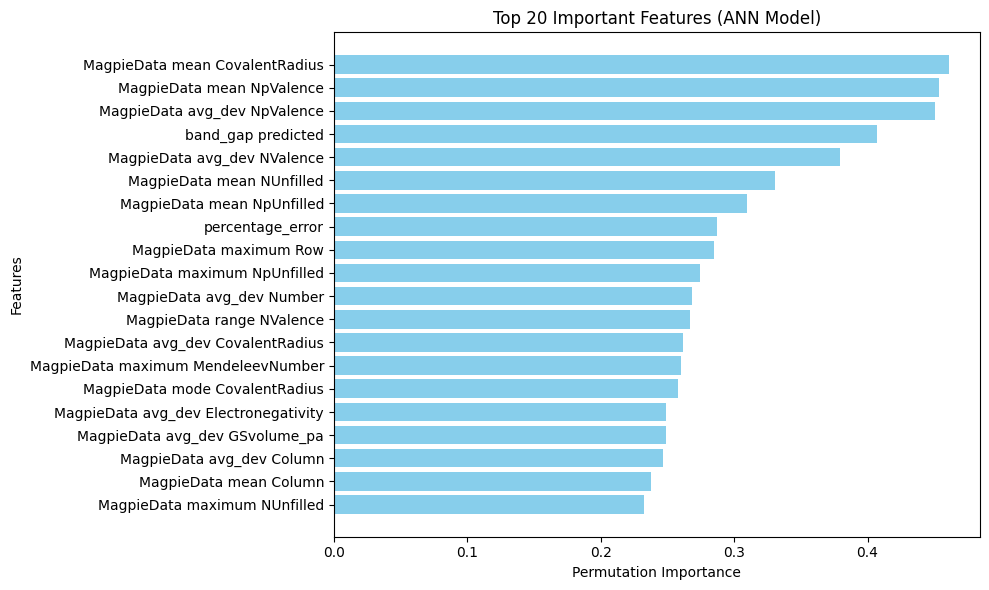

In [24]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Wrap your PyTorch model into a scikit-learn compatible estimator
class ANNEstimatorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X=None, y=None):
        # Assume model is already trained
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            preds = self.model(X_tensor).numpy().flatten()
            return preds

# Step 2: Wrap your trained ANN model
wrapped_model = ANNEstimatorWrapper(model)

# Step 3: Run permutation importance
result = permutation_importance(
    wrapped_model,
    X_scaled,
    y,
    scoring='neg_mean_absolute_error',
    n_repeats=10,
    random_state=42
)

# Step 4: Get feature names
feature_names = bg_data_cleaned.loc[:, featurizer.feature_labels()[0]:].columns.tolist()

# Step 5: Create DataFrame and sort by importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False).head(20)

print("\nTop 20 Most Important Features (Based on Permutation Importance):")
print(feature_importance_df)

# Step 6: Plot top 20 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features (ANN Model)')
plt.gca().invert_yaxis()  # Show most important at the top
plt.tight_layout()
plt.show()

In [28]:
bg_data_cleaned["band_gap predicted"] = y_pred
bg_data_cleaned['percentage_error'] = (bg_data_cleaned["gap expt"] - bg_data_cleaned['band_gap predicted']).abs()/bg_data_cleaned['gap expt'] * 100
bg_data_cleaned.head(20)

,formula,gap expt,composition,molecular_weight,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,band_gap predicted,percentage_error
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",152.728341,48.0,80.0,32.0,13.160000,52.0,70.0,...,5.624261,34.763333,152.0,194.0,42.0,163.200000,11.200000,152.0,0.331477,5.292281
1,CuBr,3.08,"(Cu, Br)",70.923968,29.0,35.0,6.0,3.000000,29.0,64.0,...,9.205000,11.070000,64.0,225.0,161.0,144.500000,80.500000,64.0,3.012724,2.184296
2,LuP,1.30,"(Lu, P)",102.957269,15.0,71.0,56.0,28.000000,15.0,41.0,...,3.147381,22.570238,2.0,194.0,192.0,98.000000,96.000000,2.0,1.298632,0.105201
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",78.669837,29.0,51.0,22.0,4.187500,34.0,64.0,...,7.489688,25.920000,14.0,225.0,211.0,112.125000,98.125000,14.0,0.383364,4.159039
4,ZnO,3.44,"(Zn, O)",39.962028,8.0,30.0,22.0,11.000000,8.0,69.0,...,2.427500,9.105000,12.0,194.0,182.0,103.000000,91.000000,12.0,3.418432,0.626991
5,PtSb2,0.08,"(Pt, Sb)",145.590805,51.0,78.0,27.0,12.000000,51.0,63.0,...,7.351111,31.560000,166.0,225.0,59.0,185.666667,26.222222,166.0,0.116627,45.783843
6,ZnIn2S4,2.68,"(Zn, In, S)",60.232169,16.0,49.0,33.0,13.061224,16.0,69.0,...,2.771735,25.786875,70.0,194.0,124.0,107.428571,42.775510,70.0,2.731187,1.909967
7,K2Cd3Te4,2.26,"(K, Cd, Te)",104.362489,19.0,52.0,33.0,10.814815,52.0,3.0,...,15.516461,34.763333,152.0,229.0,77.0,183.111111,27.654321,152.0,2.233391,1.177387
8,K4Sn3Ce3S14,2.46,"(K, Sn, Ce, S)",57.620282,16.0,58.0,42.0,14.000000,16.0,3.0,...,12.654148,25.786875,70.0,229.0,159.0,120.875000,59.354167,70.0,2.382479,3.151272
9,Pb6B2CrO12,1.80,"(Pb, B, Cr, O)",72.083715,5.0,82.0,77.0,29.931973,8.0,49.0,...,7.805578,9.105000,12.0,229.0,217.0,97.857143,98.122449,12.0,1.772040,1.553339


In [23]:
import plotly.express as px
import plotly.graph_objects as go 

# Define the reference line
reference_line = go.Scatter(
    x=[0, max(bg_data_cleaned["gap expt"].max(), bg_data_cleaned["band_gap predicted"].max())],
    y=[0, max(bg_data_cleaned["gap expt"].max(), bg_data_cleaned["band_gap predicted"].max())],
    line=dict(color='black', dash='dash'),
    mode="lines",
    showlegend=False
)

# Create scatter plot
fig = px.scatter(
    bg_data_cleaned,
    x="gap expt",
    y="band_gap predicted",
    hover_name="formula",
    color='percentage_error',
    color_continuous_scale=px.colors.sequential.Bluered,
    labels={"gap expt": "Experimental Band Gap", "band_gap predicted": "Predicted Band Gap", "percentage_error": "Percentage Error"}
)

# Add reference line to the figure
fig.add_trace(reference_line)

# Show the plot
fig.show()


Best RMSE from cross-validation: 0.5357 at round 99
Final MSE: 0.1717
Final RMSE: 0.4143
Final MAE: 0.2873


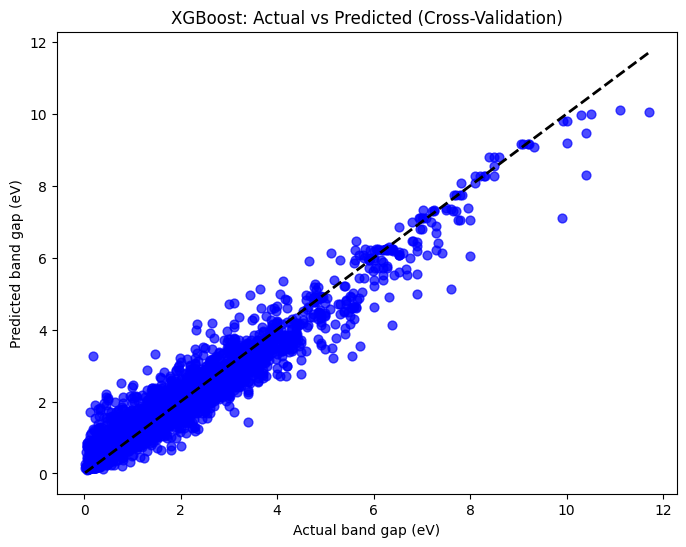

In [19]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract features and target
X = bg_data_cleaned.loc[:, featurizer.feature_labels()[0]:].values
y = bg_data_cleaned['gap expt'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Prepare data for XGBoost
dtrain = xgb.DMatrix(X_scaled, label=y)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

# Step 3: Perform cross-validation using xgboost.cv
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    nfold=5,
    metrics="rmse",  # Root Mean Squared Error for evaluation
    early_stopping_rounds=10,  # Stop early if performance stops improving
    as_pandas=True,  # Return the result as a pandas dataframe
    seed=42
)

# Step 4: Extract the best RMSE from cross-validation
best_rmse = cv_results['test-rmse-mean'].min()
best_iter = cv_results['test-rmse-mean'].idxmin()

print(f"Best RMSE from cross-validation: {best_rmse:.4f} at round {best_iter}")

# Step 5: Train the final model using the best number of boosting rounds
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=best_iter  # Use the best number of boosting rounds
)

# Train the model
xg_reg.fit(X_scaled, y)

# Step 6: Evaluate the model
y_pred = xg_reg.predict(X_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"Final MSE: {mse:.4f}")
print(f"Final RMSE: {rmse:.4f}")
print(f"Final MAE: {mae:.4f}")

# Step 7: Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, s=40, color='blue', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual band gap (eV)")
plt.ylabel("Predicted band gap (eV)")
plt.title("XGBoost: Actual vs Predicted (Cross-Validation)")
plt.show()


In [20]:
bg_data_cleaned["band_gap predicted"] = y_pred
bg_data_cleaned['percentage_error'] = (bg_data_cleaned["gap expt"] - bg_data_cleaned['band_gap predicted']).abs()/bg_data_cleaned['gap expt'] * 100
bg_data_cleaned.head(20)

,formula,gap expt,composition,molecular_weight,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,band_gap predicted,percentage_error
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",152.728341,48.0,80.0,32.0,13.160000,52.0,70.0,...,5.624261,34.763333,152.0,194.0,42.0,163.200000,11.200000,152.0,0.498819,42.519806
1,CuBr,3.08,"(Cu, Br)",70.923968,29.0,35.0,6.0,3.000000,29.0,64.0,...,9.205000,11.070000,64.0,225.0,161.0,144.500000,80.500000,64.0,3.035736,1.437156
2,LuP,1.30,"(Lu, P)",102.957269,15.0,71.0,56.0,28.000000,15.0,41.0,...,3.147381,22.570238,2.0,194.0,192.0,98.000000,96.000000,2.0,0.928988,28.539400
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",78.669837,29.0,51.0,22.0,4.187500,34.0,64.0,...,7.489688,25.920000,14.0,225.0,211.0,112.125000,98.125000,14.0,0.810333,102.583164
4,ZnO,3.44,"(Zn, O)",39.962028,8.0,30.0,22.0,11.000000,8.0,69.0,...,2.427500,9.105000,12.0,194.0,182.0,103.000000,91.000000,12.0,3.422305,0.514400
5,PtSb2,0.08,"(Pt, Sb)",145.590805,51.0,78.0,27.0,12.000000,51.0,63.0,...,7.351111,31.560000,166.0,225.0,59.0,185.666667,26.222222,166.0,0.121994,52.492886
6,ZnIn2S4,2.68,"(Zn, In, S)",60.232169,16.0,49.0,33.0,13.061224,16.0,69.0,...,2.771735,25.786875,70.0,194.0,124.0,107.428571,42.775510,70.0,2.780645,3.755424
7,K2Cd3Te4,2.26,"(K, Cd, Te)",104.362489,19.0,52.0,33.0,10.814815,52.0,3.0,...,15.516461,34.763333,152.0,229.0,77.0,183.111111,27.654321,152.0,1.941636,14.086888
8,K4Sn3Ce3S14,2.46,"(K, Sn, Ce, S)",57.620282,16.0,58.0,42.0,14.000000,16.0,3.0,...,12.654148,25.786875,70.0,229.0,159.0,120.875000,59.354167,70.0,2.233913,9.190540
9,Pb6B2CrO12,1.80,"(Pb, B, Cr, O)",72.083715,5.0,82.0,77.0,29.931973,8.0,49.0,...,7.805578,9.105000,12.0,229.0,217.0,97.857143,98.122449,12.0,2.587188,43.732667



Top 20 Most Important Features (Excluding Predicted Columns):
                                 Feature  Importance
4                 MagpieData mode Number    0.237979
28  MagpieData maximum Electronegativity    0.101598
26        MagpieData mode CovalentRadius    0.095402
31  MagpieData avg_dev Electronegativity    0.069442
29    MagpieData range Electronegativity    0.066239
63      MagpieData mode SpaceGroupNumber    0.054499
15              MagpieData mode MeltingT    0.048199
21     MagpieData minimum CovalentRadius    0.026367
44              MagpieData mean NValence    0.024244
52             MagpieData mean NUnfilled    0.020293
0              MagpieData minimum Number    0.020092
48           MagpieData range NpUnfilled    0.017417
47         MagpieData maximum NpUnfilled    0.014903
40          MagpieData avg_dev NpValence    0.012811
32     MagpieData mode Electronegativity    0.011901
10           MagpieData minimum MeltingT    0.010825
18             MagpieData avg_dev Co

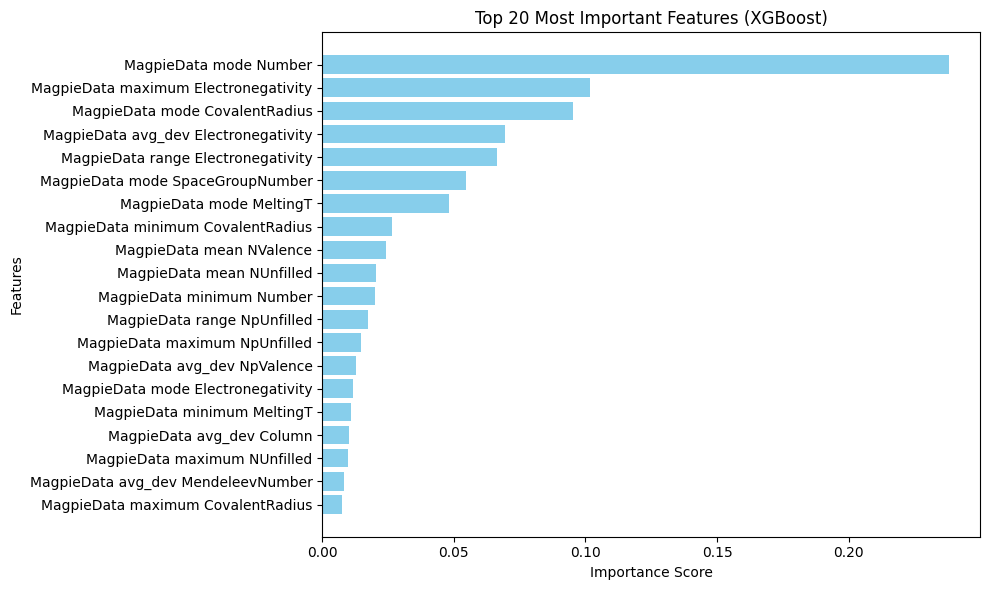

In [21]:
# Get all feature names
all_feature_names = bg_data_cleaned.loc[:, featurizer.feature_labels()[0]:].columns.tolist()

# Get indices where importance is present
used_indices = np.where(~np.isnan(xg_reg.feature_importances_))[0]

# Filter only those that were actually used
used_feature_names = [all_feature_names[i] for i in used_indices]

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': used_feature_names,
    'Importance': xg_reg.feature_importances_[~np.isnan(xg_reg.feature_importances_)]
})

# Sort and plot as before
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# List of columns to exclude
exclude_features = ['band_gap predicted', 'percentage_error']

# Filter out those features
feature_importance_df_filtered = feature_importance_df[
    ~feature_importance_df['Feature'].isin(exclude_features)
]

# Take top 20 after filtering
top_20_features = feature_importance_df_filtered.head(20)

print("\nTop 20 Most Important Features (Excluding Predicted Columns):")
print(top_20_features)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Most Important Features (XGBoost)')
plt.gca().invert_yaxis()  # Show most important at the top
plt.tight_layout()
plt.show()

In [ ]:
bg_data_cleaned["band_gap predicted"] = y_pred
bg_data_cleaned['percentage_error'] = (bg_data_cleaned["gap expt"] - bg_data_cleaned['band_gap predicted']).abs()/bg_data_cleaned['gap expt'] * 100
bg_data_cleaned.head(20)

In [48]:
import plotly.express as px
import plotly.graph_objects as go 

# Define the reference line
reference_line = go.Scatter(
    x=[0, max(bg_data_cleaned["gap expt"].max(), bg_data_cleaned["band_gap predicted"].max())],
    y=[0, max(bg_data_cleaned["gap expt"].max(), bg_data_cleaned["band_gap predicted"].max())],
    line=dict(color='black', dash='dash'),
    mode="lines",
    showlegend=False
)

# Create scatter plot
fig = px.scatter(
    bg_data_cleaned,
    x="gap expt",
    y="band_gap predicted",
    hover_name="formula",
    color='percentage_error',
    color_continuous_scale=px.colors.sequential.Bluered,
    labels={"gap expt": "Experimental Band Gap", "band_gap predicted": "Predicted Band Gap", "percentage_error": "Percentage Error"}
)

# Add reference line to the figure
fig.add_trace(reference_line)

# Show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

Final MSE: 0.6329
Final RMSE: 0.7956
Final MAE: 0.5709


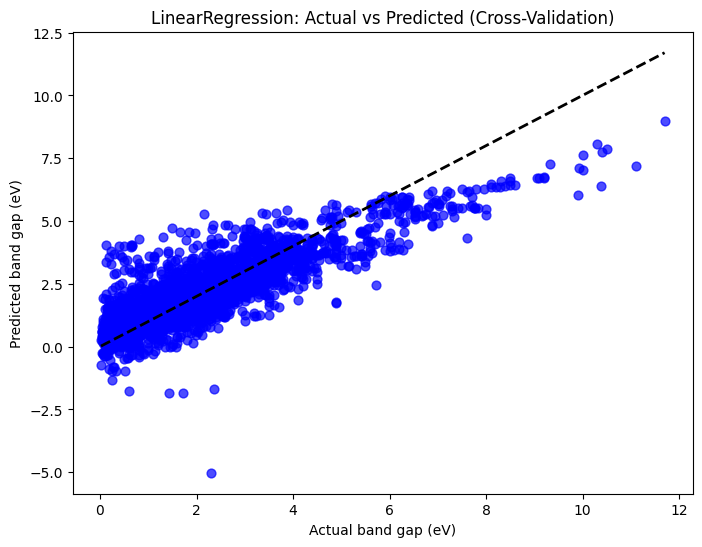

In [19]:
Lr = LinearRegression()
Kfold = KFold(n_splits=5, shuffle=True)
scaler = StandardScaler()

X = bg_data_cleaned.loc[:,featurizer.feature_labels()[0]:]
X_scaled = scaler.fit_transform(X)
y = bg_data_cleaned['gap expt']

yhat = cross_val_predict(Lr,X_scaled,y, cv=Kfold)

# Calculate evaluation metrics
mse = mean_squared_error(y, yhat)
mae = mean_absolute_error(y, yhat)
rmse = np.sqrt(mse)

print(f"Final MSE: {mse:.4f}")
print(f"Final RMSE: {rmse:.4f}")
print(f"Final MAE: {mae:.4f}")

# fig, ax = plt.subplots(figsize=(5,5))
# ax.scatter(y,yhat, s=40)
# ax.plot(y, y , c='k', zorder=-5)
# ax.set_xlabel("actual band gap (eV)")
# ax.set_ylabel("predicted band gap (eV)")
# ax.set_xlim(-1,13)
# ax.set_ylim(-5,13)
# plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y, yhat, s=40, color='blue', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual band gap (eV)")
plt.ylabel("Predicted band gap (eV)")
plt.title("LinearRegression: Actual vs Predicted (Cross-Validation)")
plt.show()


Top 20 Most Important Features (Excluding Predicted Columns):
                                 Feature  Importance
31  MagpieData avg_dev Electronegativity    3.496891
40          MagpieData avg_dev NpValence    1.200601
35             MagpieData mean NsValence    1.078195
30     MagpieData mean Electronegativity    1.012411
34          MagpieData maximum NsValence    0.678105
50         MagpieData avg_dev NpUnfilled    0.551244
39             MagpieData mean NpValence    0.513551
28  MagpieData maximum Electronegativity    0.505005
36             MagpieData mode NsValence    0.473910
20                MagpieData maximum Row    0.362726
27  MagpieData minimum Electronegativity    0.351159
16             MagpieData maximum Column    0.290974
49            MagpieData mean NpUnfilled    0.267903
37          MagpieData maximum NpValence    0.207279
38            MagpieData range NpValence    0.178712
33          MagpieData minimum NsValence    0.160632
29    MagpieData range Electronegati

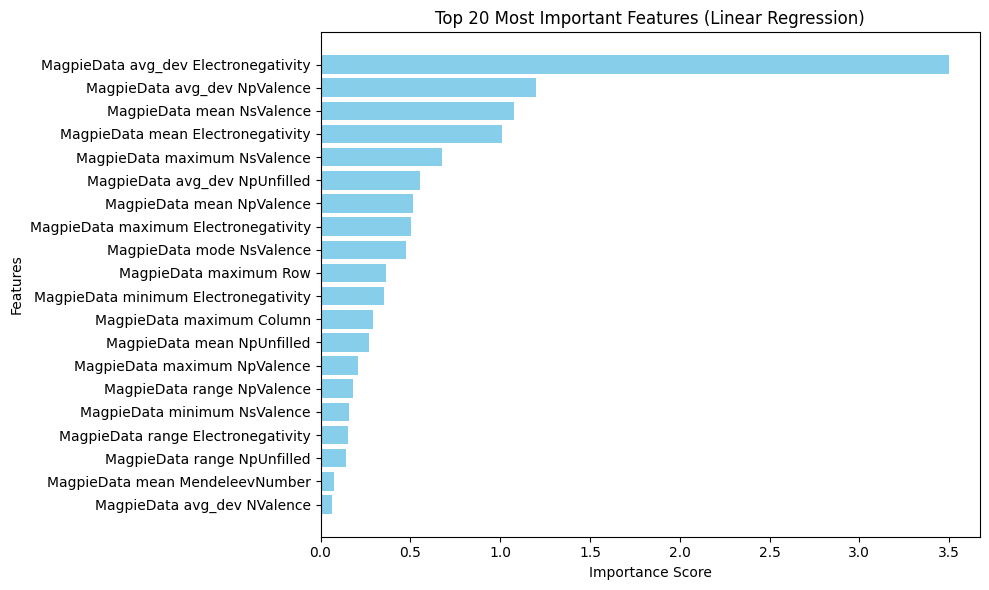

In [20]:
# Step 1: Fit the Linear Regression model
Lr.fit(X, y)

# Step 2: Get absolute values of coefficients as feature importance
importances = np.abs(Lr.coef_)

# Step 3: Get feature names
feature_names = bg_data_cleaned.loc[:, featurizer.feature_labels()[0]:].columns.tolist()

# Step 4: Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 5: Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# List of columns to exclude
exclude_features = ['band_gap predicted', 'percentage_error']

# Filter out those features
feature_importance_df_filtered = feature_importance_df[
    ~feature_importance_df['Feature'].isin(exclude_features)
]

# Take top 20 after filtering
top_20_features = feature_importance_df_filtered.head(20)

print("\nTop 20 Most Important Features (Excluding Predicted Columns):")
print(top_20_features)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Most Important Features (Linear Regression)')
plt.gca().invert_yaxis()  # Show most important at the top
plt.tight_layout()
plt.show()

In [46]:
bg_data_cleaned["band_gap predicted"] = yhat
bg_data_cleaned['percentage_error'] = (bg_data_cleaned["gap expt"] - bg_data_cleaned['band_gap predicted']).abs()/bg_data_cleaned['gap expt'] * 100
bg_data_cleaned.head(20)

,formula,gap expt,composition,molecular_weight,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,band_gap predicted,percentage_error
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",152.728341,48.0,80.0,32.0,13.160000,52.0,70.0,...,5.624261,34.763333,152.0,194.0,42.0,163.200000,11.200000,152.0,0.347453,0.727813
1,CuBr,3.08,"(Cu, Br)",70.923968,29.0,35.0,6.0,3.000000,29.0,64.0,...,9.205000,11.070000,64.0,225.0,161.0,144.500000,80.500000,64.0,3.052901,0.879836
2,LuP,1.30,"(Lu, P)",102.957269,15.0,71.0,56.0,28.000000,15.0,41.0,...,3.147381,22.570238,2.0,194.0,192.0,98.000000,96.000000,2.0,0.985396,24.200317
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",78.669837,29.0,51.0,22.0,4.187500,34.0,64.0,...,7.489688,25.920000,14.0,225.0,211.0,112.125000,98.125000,14.0,0.568342,42.085533
4,ZnO,3.44,"(Zn, O)",39.962028,8.0,30.0,22.0,11.000000,8.0,69.0,...,2.427500,9.105000,12.0,194.0,182.0,103.000000,91.000000,12.0,3.403352,1.065344
5,PtSb2,0.08,"(Pt, Sb)",145.590805,51.0,78.0,27.0,12.000000,51.0,63.0,...,7.351111,31.560000,166.0,225.0,59.0,185.666667,26.222222,166.0,-0.065154,181.442741
6,ZnIn2S4,2.68,"(Zn, In, S)",60.232169,16.0,49.0,33.0,13.061224,16.0,69.0,...,2.771735,25.786875,70.0,194.0,124.0,107.428571,42.775510,70.0,2.866346,6.953193
7,K2Cd3Te4,2.26,"(K, Cd, Te)",104.362489,19.0,52.0,33.0,10.814815,52.0,3.0,...,15.516461,34.763333,152.0,229.0,77.0,183.111111,27.654321,152.0,2.130334,5.737448
8,K4Sn3Ce3S14,2.46,"(K, Sn, Ce, S)",57.620282,16.0,58.0,42.0,14.000000,16.0,3.0,...,12.654148,25.786875,70.0,229.0,159.0,120.875000,59.354167,70.0,2.048411,16.731266
9,Pb6B2CrO12,1.80,"(Pb, B, Cr, O)",72.083715,5.0,82.0,77.0,29.931973,8.0,49.0,...,7.805578,9.105000,12.0,229.0,217.0,97.857143,98.122449,12.0,2.744413,52.467404


Final MSE: 0.2350
Final RMSE: 0.4848
Final MAE: 0.2847


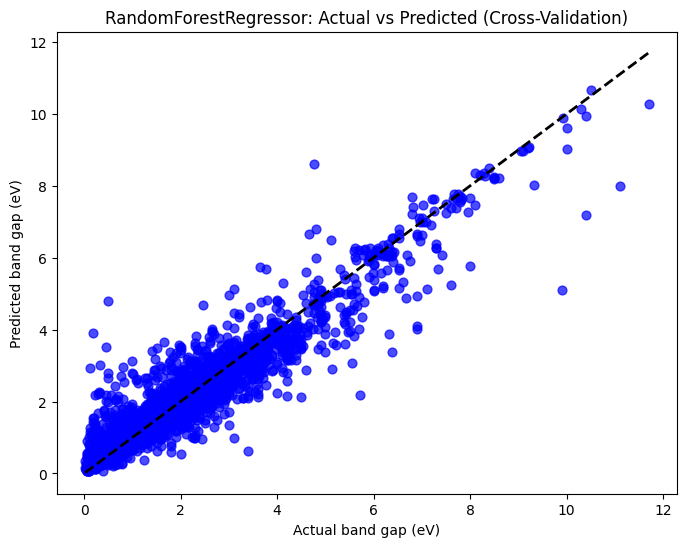

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
kfold = KFold(n_splits=5, shuffle=True , random_state=0)
y_hat = cross_val_predict(rf, X, y, cv=kfold)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_hat)
mae = mean_absolute_error(y, y_hat)
rmse = np.sqrt(mse)

print(f"Final MSE: {mse:.4f}")
print(f"Final RMSE: {rmse:.4f}")
print(f"Final MAE: {mae:.4f}")


# fig, ax = plt.subplots(figsize=(7,7))
# ax.scatter(y, y_hat, s=30)
# ax.plot(y, y, 'k', zorder=-5)
# ax.set_xlabel('actual band gap (eV)')
# ax.set_ylabel('predicted band gap (eV)')
# plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y, y_hat, s=40, color='blue', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual band gap (eV)")
plt.ylabel("Predicted band gap (eV)")
plt.title("RandomForestRegressor: Actual vs Predicted (Cross-Validation)")
plt.show()


Top 20 Most Important Features (Excluding Predicted Columns):
                                 Feature  Importance
28  MagpieData maximum Electronegativity    0.328599
18             MagpieData avg_dev Column    0.150535
31  MagpieData avg_dev Electronegativity    0.077586
44              MagpieData mean NValence    0.062628
24        MagpieData mean CovalentRadius    0.043270
29    MagpieData range Electronegativity    0.023171
53        MagpieData minimum GSvolume_pa    0.017167
52             MagpieData mean NUnfilled    0.014676
62   MagpieData avg_dev SpaceGroupNumber    0.013965
13              MagpieData mean MeltingT    0.013482
30     MagpieData mean Electronegativity    0.011365
22     MagpieData maximum CovalentRadius    0.010965
40          MagpieData avg_dev NpValence    0.010759
3              MagpieData avg_dev Number    0.009642
56        MagpieData avg_dev GSvolume_pa    0.009264
25     MagpieData avg_dev CovalentRadius    0.009143
50         MagpieData avg_dev NpUnfi

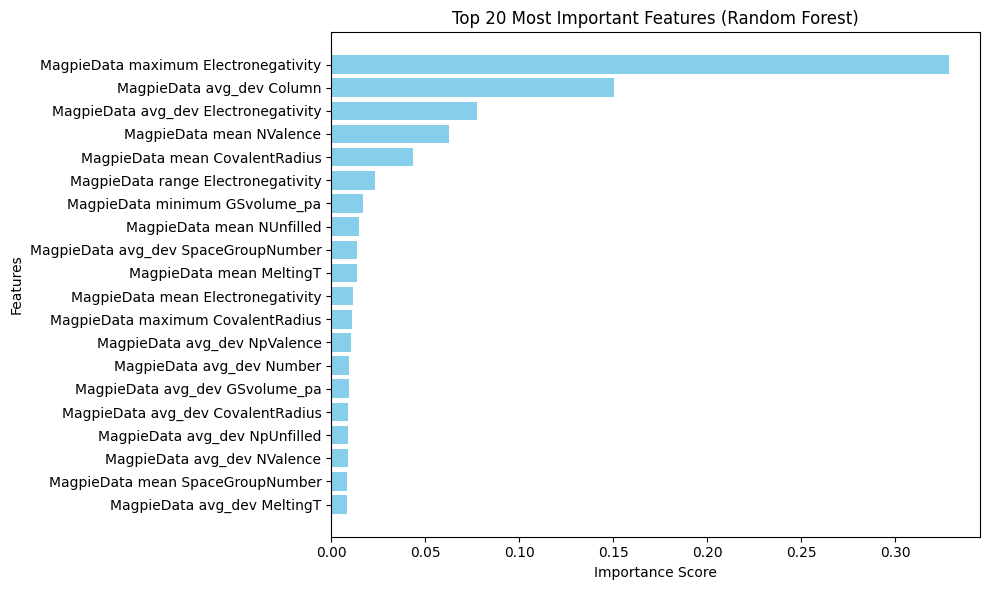

In [23]:
rf.fit(X, y) 

all_feature_names = bg_data_cleaned.loc[:, featurizer.feature_labels()[0]:].columns.tolist()

# Get feature importances
importances = rf.feature_importances_

# Create DataFrame only for valid features
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Remove features with zero importance if desired
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0]
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# List of columns to exclude
exclude_features = ['band_gap predicted', 'percentage_error']

# Filter out those features
feature_importance_df_filtered = feature_importance_df[
    ~feature_importance_df['Feature'].isin(exclude_features)
]

# Take top 20 after filtering
top_20_features = feature_importance_df_filtered.head(20)

print("\nTop 20 Most Important Features (Excluding Predicted Columns):")
print(top_20_features)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()  # Show most important at the top
plt.tight_layout()
plt.show()

In [44]:
scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=kfold)

In [45]:
rmse_score = [np.sqrt(abs(s)) for s in scores]
print('Mean RMSE: {:.3f}'.format(np.mean(rmse_score)))

Mean RMSE: 0.271


In [27]:
bg_data_cleaned["band_gap predicted"] = y_hat
bg_data_cleaned['percentage_error'] = (bg_data_cleaned["gap expt"] - bg_data_cleaned['band_gap predicted']).abs()/bg_data_cleaned['gap expt'] * 100
bg_data_cleaned.head(20)

,formula,gap expt,composition,molecular_weight,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,band_gap predicted,percentage_error
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)",152.728341,48.0,80.0,32.0,13.160000,52.0,70.0,...,5.624261,34.763333,152.0,194.0,42.0,163.200000,11.200000,152.0,0.259325,25.907143
1,CuBr,3.08,"(Cu, Br)",70.923968,29.0,35.0,6.0,3.000000,29.0,64.0,...,9.205000,11.070000,64.0,225.0,161.0,144.500000,80.500000,64.0,2.991057,2.887766
2,LuP,1.30,"(Lu, P)",102.957269,15.0,71.0,56.0,28.000000,15.0,41.0,...,3.147381,22.570238,2.0,194.0,192.0,98.000000,96.000000,2.0,1.069885,17.701145
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)",78.669837,29.0,51.0,22.0,4.187500,34.0,64.0,...,7.489688,25.920000,14.0,225.0,211.0,112.125000,98.125000,14.0,0.533745,33.436220
4,ZnO,3.44,"(Zn, O)",39.962028,8.0,30.0,22.0,11.000000,8.0,69.0,...,2.427500,9.105000,12.0,194.0,182.0,103.000000,91.000000,12.0,3.404082,1.044136
5,PtSb2,0.08,"(Pt, Sb)",145.590805,51.0,78.0,27.0,12.000000,51.0,63.0,...,7.351111,31.560000,166.0,225.0,59.0,185.666667,26.222222,166.0,0.126779,58.473438
6,ZnIn2S4,2.68,"(Zn, In, S)",60.232169,16.0,49.0,33.0,13.061224,16.0,69.0,...,2.771735,25.786875,70.0,194.0,124.0,107.428571,42.775510,70.0,2.775774,3.573648
7,K2Cd3Te4,2.26,"(K, Cd, Te)",104.362489,19.0,52.0,33.0,10.814815,52.0,3.0,...,15.516461,34.763333,152.0,229.0,77.0,183.111111,27.654321,152.0,1.975930,12.569485
8,K4Sn3Ce3S14,2.46,"(K, Sn, Ce, S)",57.620282,16.0,58.0,42.0,14.000000,16.0,3.0,...,12.654148,25.786875,70.0,229.0,159.0,120.875000,59.354167,70.0,2.379733,3.262873
9,Pb6B2CrO12,1.80,"(Pb, B, Cr, O)",72.083715,5.0,82.0,77.0,29.931973,8.0,49.0,...,7.805578,9.105000,12.0,229.0,217.0,97.857143,98.122449,12.0,2.910900,61.716667


In [30]:
import plotly.express as px
import plotly.graph_objects as go 

refrence_line = go.Scatter(
    x=[0, 12],
    y=[0,12] ,
    line=dict(color='black', dash='dash'),
    mode="lines",
    showlegend=False
)

fig = px.scatter(
    bg_data_cleaned,
    x="gap expt",
    y="band_gap predicted",
    hover_name="formula",
    color='percentage_error',
    color_continuous_scale=px.colors.sequential.Bluered
)

fig.add_trace(refrence_line)
fig.show()

In [48]:
fig.show(renderer = "firefox")   

In [49]:
import plotly.io as pio 
pio.write_html(fig, file='index.html',auto_open=True)

In [ ]:
'''
1.Matminer
'''